![Nestle](graphics/01_Intro.png)

# 1. Import libraries

In [1]:
# data manipulation
import numpy as np
import pandas as pd
import datetime as dt
import time as time

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from operational_helpful_functions import plot_products, make_forecast

# Feature Engineering
from sklearn.pipeline import Pipeline
from operational_helpful_functions import MakeTSTransformer, FeatureEngineeringTransformer

# Feature Selection
from operational_helpful_functions import Initial_Feature_Selection, FeatureSelection

# models
from sklearn.ensemble import RandomForestRegressor

# optimization and hyperparameters
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# Model evaluation
from operational_helpful_functions import model_evaluation

# saving models
from joblib import dump

# open models
from joblib import load

![SellIn_SellOut](graphics/02_SellIn_SellOut.png)

In [ ]:
YEP

# 2. Load dataset

In [2]:
dataset = pd.read_csv('History_SellIn_SellOut.csv', sep=';')
dataset['PERIOD_TAG'] = pd.to_datetime(dataset['PERIOD_TAG'], format='%Y-%m-%d')
dataset

PERIOD_TAG product_group customer_name  dispatches_SellIn  orders_SellIn  \
0    2016-08-07    Product_01   Customer_01                130            130   
1    2016-08-07    Product_02   Customer_01                392            392   
2    2016-08-07    Product_04   Customer_01               3976           3976   
3    2016-08-07    Product_05   Customer_01                115            115   
4    2016-08-07    Product_06   Customer_01                155            155   
...         ...           ...           ...                ...            ...   
6868 2019-12-29    Product_38   Customer_01                  7              7   
6869 2019-12-29    Product_39   Customer_01               2169           2169   
6870 2019-12-29    Product_40   Customer_01                725            725   
6871 2019-12-29    Product_41   Customer_01               2732           2732   
6872 2019-12-29    Product_42   Customer_01               5189           5396   

      SellOut  numeric_distribution_selling_promotion  \
0           0                                     0.0   
1           0                                     0.0   
2           0                                     0.0   
3           0                                     0.0   
4           0                                     0.0   
...       ...                                     ...   
6868       25                                     0.0   
6869     1643                                     3.0   
6870      222                                     0.2   
6871     2128                                     2.3   
6872     4068                                     0.3   

      numeric_distribution_selling_promotion_hyperparmarkets  type_promo_1  \
0                                                   0.0                0.0   
1                                                   0.0                0.0   
2                                                   0.0                0.0   
3                                                   0.0                0.0   
4                                                   0.0                0.0   
...                                                 ...                ...   
6868                                                0.0                0.0   
6869                                                0.0                0.0   
6870                                                0.0                0.0   
6871                                                0.0                0.0   
6872                                                0.0                0.0   

      type_promo_2  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
...            ...  
6868           0.0  
6869           0.0  
6870           0.0  
6871           0.0  
6872           0.0  

[6873 rows x 10 columns]

# 3. Exploratory Data Analysis

In [3]:
list(dataset['customer_name'].unique())

['Customer_01']

In [4]:
list(dataset['product_group'].sort_values().unique())

['Product_01',
 'Product_02',
 'Product_03',
 'Product_04',
 'Product_05',
 'Product_06',
 'Product_07',
 'Product_08',
 'Product_09',
 'Product_10',
 'Product_11',
 'Product_12',
 'Product_13',
 'Product_14',
 'Product_15',
 'Product_16',
 'Product_17',
 'Product_18',
 'Product_19',
 'Product_20',
 'Product_21',
 'Product_22',
 'Product_23',
 'Product_24',
 'Product_25',
 'Product_26',
 'Product_27',
 'Product_28',
 'Product_29',
 'Product_30',
 'Product_31',
 'Product_32',
 'Product_33',
 'Product_34',
 'Product_35',
 'Product_36',
 'Product_37',
 'Product_38',
 'Product_39',
 'Product_40',
 'Product_41',
 'Product_42']

In [5]:
dataset.describe()

dispatches_SellIn  orders_SellIn        SellOut  \
count        6873.000000    6873.000000    6873.000000   
mean         1726.016441    1858.703768    1519.934963   
std          4725.752397    5117.955945    4728.257145   
min             0.000000       0.000000       0.000000   
25%            43.000000      51.000000      72.000000   
50%           311.000000     346.000000     264.000000   
75%          1665.000000    1731.000000    1606.000000   
max         72152.000000   82339.000000  123834.000000   

       numeric_distribution_selling_promotion  \
count                             6873.000000   
mean                                 5.881900   
std                                 17.755219   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.200000   
75%                                  1.400000   
max                                 97.500000   

       numeric_distribution_selling_promotion_hyperparmarkets  type_promo_1  \
count                                        6873.000000        6873.000000   
mean                                            5.563111           0.053979   
std                                            20.501607           0.225993   
min                                             0.000000           0.000000   
25%                                             0.000000           0.000000   
50%                                             0.000000           0.000000   
75%                                             0.000000           0.000000   
max                                            99.421965           1.000000   

       type_promo_2  
count   6873.000000  
mean       0.073912  
std        0.261647  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [6]:
plot_products(df=dataset.copy(), num=3)

In [7]:
increase_sell_In_Out = pd.DataFrame()
for prod in dataset['product_group'].unique():
    one_prod = dataset.loc[dataset['product_group']==prod, :].copy()
    for shift in range(1, 7):
        one_prod[f'SellOut_Shift_{shift}'] = one_prod['SellOut'].shift(-shift)
    one_prod.dropna(inplace=True)

    increase_sell_In_Out = pd.concat([increase_sell_In_Out, one_prod])
increase_sell_In_Out

PERIOD_TAG product_group customer_name  dispatches_SellIn  orders_SellIn  \
0    2016-08-07    Product_01   Customer_01                130            130   
28   2016-08-14    Product_01   Customer_01                  4              5   
59   2016-08-21    Product_01   Customer_01                130            130   
90   2016-08-28    Product_01   Customer_01                 61             61   
121  2016-09-04    Product_01   Customer_01                 57             58   
...         ...           ...           ...                ...            ...   
6446 2019-10-20    Product_36   Customer_01                 17             17   
6488 2019-10-27    Product_36   Customer_01                  0              0   
6530 2019-11-03    Product_36   Customer_01                  7              7   
6572 2019-11-10    Product_36   Customer_01                 22             22   
6614 2019-11-17    Product_36   Customer_01                  2              2   

      SellOut  numeric_distribution_selling_promotion  \
0           0                                     0.0   
28         92                                     0.1   
59         84                                     0.0   
90         91                                     0.0   
121       108                                     0.1   
...       ...                                     ...   
6446        0                                     0.0   
6488        0                                     0.0   
6530        0                                     0.0   
6572        0                                     0.0   
6614        0                                     0.0   

      numeric_distribution_selling_promotion_hyperparmarkets  type_promo_1  \
0                                                   0.0                0.0   
28                                                  0.0                0.0   
59                                                  0.0                0.0   
90                                                  0.0                0.0   
121                                                 0.0                0.0   
...                                                 ...                ...   
6446                                                0.0                0.0   
6488                                                0.0                0.0   
6530                                                0.0                0.0   
6572                                                0.0                0.0   
6614                                                0.0                0.0   

      type_promo_2  SellOut_Shift_1  SellOut_Shift_2  SellOut_Shift_3  \
0              0.0             92.0             84.0             91.0   
28             0.0             84.0             91.0            108.0   
59             0.0             91.0            108.0            182.0   
90             0.0            108.0            182.0             99.0   
121            0.0            182.0             99.0             96.0   
...            ...              ...              ...              ...   
6446           0.0              0.0              0.0              0.0   
6488           0.0              0.0              0.0              0.0   
6530           0.0              0.0              0.0              0.0   
6572           0.0              0.0              0.0              0.0   
6614           0.0              0.0              0.0              0.0   

      SellOut_Shift_4  SellOut_Shift_5  SellOut_Shift_6  
0               108.0            182.0             99.0  
28              182.0             99.0             96.0  
59               99.0             96.0            110.0  
90               96.0            110.0             98.0  
121             110.0             98.0             96.0  
...               ...              ...              ...  
6446              0.0              0.0              0.0  
6488              0.0              0.0              0.0  
6530       

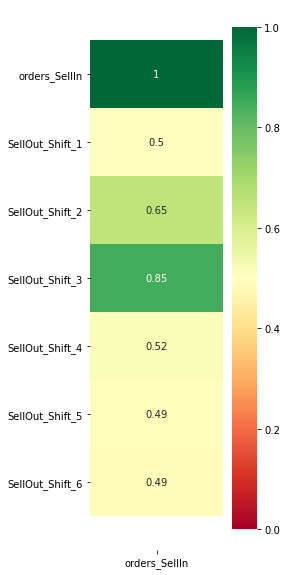

In [8]:
plt.figure(figsize = (3, 10))
columns_to_corr = ['orders_SellIn']+list(increase_sell_In_Out.loc[:, 'SellOut_Shift_1':].columns)
ax = sns.heatmap(pd.DataFrame(increase_sell_In_Out[columns_to_corr].corr()['orders_SellIn']),
                 annot = True, cmap='RdYlGn', vmin=0, vmax=1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.show()

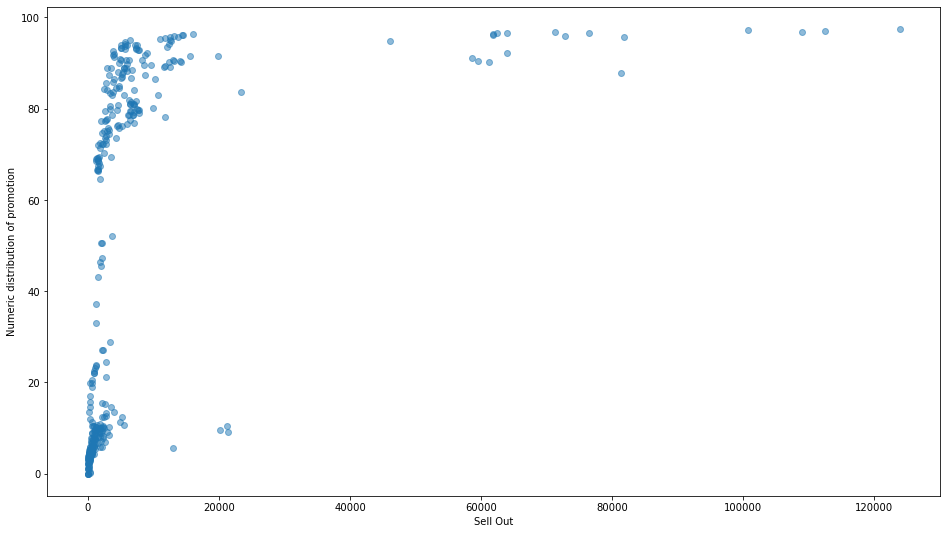

In [9]:
plt.figure(figsize=(16, 9))
plt.scatter(increase_sell_In_Out.loc[increase_sell_In_Out['type_promo_1']==1, 'SellOut'], 
            increase_sell_In_Out.loc[increase_sell_In_Out['type_promo_1']==1,
                                     'numeric_distribution_selling_promotion'],
            alpha=0.5)
plt.xlabel('Sell Out')
plt.ylabel('Numeric distribution of promotion')
plt.show()

In [10]:
plt.figure(figsize=(16, 9))
plt.scatter(increase_sell_In_Out.loc[increase_sell_In_Out['type_promo_2']==1, 'SellOut'], 
            increase_sell_In_Out.loc[increase_sell_In_Out['type_promo_2']==1,
                                     'numeric_distribution_selling_promotion'],
            alpha=0.5)
plt.xlabel('Sell Out')
plt.ylabel('Numeric distribution of promotion')
plt.show()

# 4. Data Preprocessing - Feature Engineering

In [11]:
dataset

PERIOD_TAG product_group customer_name  dispatches_SellIn  orders_SellIn  \
0    2016-08-07    Product_01   Customer_01                130            130   
1    2016-08-07    Product_02   Customer_01                392            392   
2    2016-08-07    Product_04   Customer_01               3976           3976   
3    2016-08-07    Product_05   Customer_01                115            115   
4    2016-08-07    Product_06   Customer_01                155            155   
...         ...           ...           ...                ...            ...   
6868 2019-12-29    Product_38   Customer_01                  7              7   
6869 2019-12-29    Product_39   Customer_01               2169           2169   
6870 2019-12-29    Product_40   Customer_01                725            725   
6871 2019-12-29    Product_41   Customer_01               2732           2732   
6872 2019-12-29    Product_42   Customer_01               5189           5396   

      SellOut  numeric_distribution_selling_promotion  \
0           0                                     0.0   
1           0                                     0.0   
2           0                                     0.0   
3           0                                     0.0   
4           0                                     0.0   
...       ...                                     ...   
6868       25                                     0.0   
6869     1643                                     3.0   
6870      222                                     0.2   
6871     2128                                     2.3   
6872     4068                                     0.3   

      numeric_distribution_selling_promotion_hyperparmarkets  type_promo_1  \
0                                                   0.0                0.0   
1                                                   0.0                0.0   
2                                                   0.0                0.0   
3                                                   0.0                0.0   
4                                                   0.0                0.0   
...                                                 ...                ...   
6868                                                0.0                0.0   
6869                                                0.0                0.0   
6870                                                0.0                0.0   
6871                                                0.0                0.0   
6872                                                0.0                0.0   

      type_promo_2  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
...            ...  
6868           0.0  
6869           0.0  
6870           0.0  
6871           0.0  
6872           0.0  

[6873 rows x 10 columns]

## *Applied machine learning is basically feature engineering* ~ **Andrew Ng**

It is very often said that data is the **fuel** for machine learning. However, in reality this is not quite true. If we simply take the data we have as input, we would not prepare good models in most cases. It is better to say that data is like **oil**. So, first of all, a proper process of converting crude **oil** into **fuel** has to be done. This process is referred to as feature engineering.

It is the process of creating new features to enable machine learning algorithms. Correctly preparing the characteristics greatly increases their quality as we transform the raw data into information that the model will convert into knowledge.

Zatem jak możemy wzbogacić nasze dane::
#### 1) The values which we will forecast - how much we will sell in a week, in 2 weeks, etc ➞ it is our *y*

| PERIOD_TAG          | product_group   |   orders_SellIn |   SellOut |   orders_SellIn_1W |   SellOut_1W |   orders_SellIn_2W |   SellOut_2W |
|:--------------------|:----------------|----------------:|----------:|-------------------:|-------------:|-------------------:|-------------:|
| 2019-12-01 | Product_34      |           23538 |     19794 |              47019 |        16137 |              33194 |        14747 |
| 2019-12-08 | Product_34      |           47019 |     16137 |              33194 |        14747 |              29624 |        16637 |
| 2019-12-15 | Product_34      |           33194 |     14747 |              29624 |        16637 |              12224 |        15111 |
| 2019-12-22 | Product_34      |           29624 |     16637 |              12224 |        15111 |                nan |          nan |
| 2019-12-29 | Product_34      |           12224 |     15111 |                nan |          nan |                nan |          nan |

#### 2) Values from the future that we know - what the promotion will be a week from now, 2 weeks from now, etc ➞ it is our *X*

| PERIOD_TAG          | product_group   |   SellOut |   distribution |   promo_1 |   distribution_1W |   promo_1_1W |   distribution_2W |   promo_1_2W |
|:--------------------|:----------------|----------:|---------------:|----------:|------------------:|-------------:|------------------:|-------------:|
| 2016-08-07 | Product_34      |         0 |         0      |         0 |            0      |            0 |            0      |            0 |
| 2016-08-14 | Product_34      |     11949 |         0      |         0 |            0      |            0 |            0      |            0 |
| 2016-08-21 | Product_34      |     12778 |         0      |         0 |            0      |            0 |           86.1272 |            1 |
| 2016-08-28 | Product_34      |     13554 |         0      |         0 |           86.1272 |            1 |            0      |            0 |
| 2016-09-04 | Product_34      |     63963 |        86.1272 |         1 |            0      |            0 |            0      |            0 |

#### 3) Lagged values - how much we sold a week ago, 2 weeks ago, etc ➞ it is our *X*

| PERIOD_TAG          | product_group   |   orders_SellIn |   SellOut |   orders_SellIn_lag1 |   SellOut_lag1 |   orders_SellIn_lag2 |   SellOut_lag2 |
|:--------------------|:----------------|----------------:|----------:|---------------------:|---------------:|---------------------:|---------------:|
| 2016-08-07 | Product_34      |           29055 |         0 |                  nan |            nan |                  nan |            nan |
| 2016-08-14 | Product_34      |           26605 |     11949 |                29055 |              0 |                  nan |            nan |
| 2016-08-21 | Product_34      |           22996 |     12778 |                26605 |          11949 |                29055 |              0 |
| 2016-08-28 | Product_34      |           18239 |     13554 |                22996 |          12778 |                26605 |          11949 |
| 2016-09-04 | Product_34      |           12672 |     63963 |                18239 |          13554 |                22996 |          12778 |

#### 4) The rolling statistics ➞ it is our *X*
This can be the mean, median, standard deviation, sum, difference between different values (e.g. *orders* and *dispatches*)

| PERIOD_TAG          | product_group   |   orders_SellIn |   SellOut |   orders_SellIn_mean2 |   SellOut_mean2 |   orders_SellIn_mean3 |   SellOut_mean3 |
|:--------------------|:----------------|----------------:|----------:|----------------------:|----------------:|----------------------:|----------------:|
| 2016-08-07 | Product_34      |           29055 |         0 |                 nan   |           nan   |                 nan   |          nan    |
| 2016-08-14 | Product_34      |           26605 |     11949 |               27830   |          5974.5 |                 nan   |          nan    |
| 2016-08-21 | Product_34      |           22996 |     12778 |               24800.5 |         12363.5 |               26218.7 |         8242.33 |
| 2016-08-28 | Product_34      |           18239 |     13554 |               20617.5 |         13166   |               22613.3 |        12760.3  |
| 2016-09-04 | Product_34      |           12672 |     63963 |               15455.5 |         38758.5 |               17969   |        30098.3  |

#### 5) Date-related variables (seasonality)➞ it is our *X*

![Cyclicvalues](graphics/03_Cyclic.png)

| PERIOD_TAG          |   week_sin |   week_cos |
|:--------------------|-----------:|-----------:|
| 2016-08-07 |      -0.57 |      -0.82 |
| 2016-08-14 |      -0.66 |      -0.75 |
| 2018-12-23 |      -0.12 |       0.99 |
| 2018-12-30 |       0    |       1    |

In [12]:
promo_variables = ['numeric_distribution_selling_promotion', 'numeric_distribution_selling_promotion_hyperparmarkets',
                   'type_promo_1', 'type_promo_2']

steps_preprocessing = [
    ('make_ts', MakeTSTransformer(date_column='PERIOD_TAG')),
    ('feature_engineering_transformer', FeatureEngineeringTransformer(promo_variables=promo_variables))
]

pipeline_preprocessing = Pipeline(steps = steps_preprocessing)
pipeline_preprocessing.fit_transform(dataset)

Customer_01


product_group customer_name  dispatches_SellIn  orders_SellIn  \
PERIOD_TAG                                                                 
2016-09-18    Product_01   Customer_01                131            131   
2016-09-18    Product_02   Customer_01                456            456   
2016-09-18    Product_04   Customer_01               3322           3322   
2016-09-18    Product_05   Customer_01                  1              1   
2016-09-18    Product_06   Customer_01                414            414   
...                  ...           ...                ...            ...   
2019-12-29    Product_38   Customer_01                  7              7   
2019-12-29    Product_39   Customer_01               2169           2169   
2019-12-29    Product_40   Customer_01                725            725   
2019-12-29    Product_41   Customer_01               2732           2732   
2019-12-29    Product_42   Customer_01               5189           5396   

            SellOut  numeric_distribution_selling_promotion  SellOut_1W  \
PERIOD_TAG                                                                
2016-09-18       99                                     0.0        96.0   
2016-09-18      181                                     0.9       172.0   
2016-09-18     3414                                    68.5      3603.0   
2016-09-18       87                                     2.6        88.0   
2016-09-18      324                                     0.2       321.0   
...             ...                                     ...         ...   
2019-12-29       25                                     0.0         NaN   
2019-12-29     1643                                     3.0         NaN   
2019-12-29      222                                     0.2         NaN   
2019-12-29     2128                                     2.3         NaN   
2019-12-29     4068                                     0.3         NaN   

            orders_SellIn_1W  numeric_distribution_selling_promotion_1W  \
PERIOD_TAG                                                                
2016-09-18             260.0                                        0.5   
2016-09-18             452.0                                        0.4   
2016-09-18            7745.0                                       66.1   
2016-09-18               2.0                                        3.2   
2016-09-18             466.0                                        0.2   
...                      ...                                        ...   
2019-12-29               NaN                                        NaN   
2019-12-29               NaN                                        NaN   
2019-12-29               NaN                                        NaN   
2019-12-29               NaN                                        NaN   
2019-12-29               NaN                                        NaN   

            numeric_distribution_selling_promotion_hyperparmarkets_1W  ...  \
PERIOD_TAG                                                             ...   
2016-09-18                                                0.0          ...   
2016-09-18                                                0.0          ...   
2016-09-18                                                0.0          ...   
2016-09-18                                                0.0          ...   
2016-09-18                                                0.0          ...   
...                                                       ...          ...   
2019-12-29                                                NaN          ...   
2019-12-29                                                NaN          ...   
2019-12-29                                                NaN          ...   
2019-12-29                                                NaN          ...   
2019-12-29                                                NaN          ...   

            product_group_Product_33  product_group_Pro

# 5. Modelling

## 5.1 Train Test Split

In [13]:
target_columns = [
    f'SellOut_{horizon}W' for horizon in range(1, 21)]+[f'orders_SellIn_{horizon}W' for horizon in range(1, 16)]
target_columns

['SellOut_1W',
 'SellOut_2W',
 'SellOut_3W',
 'SellOut_4W',
 'SellOut_5W',
 'SellOut_6W',
 'SellOut_7W',
 'SellOut_8W',
 'SellOut_9W',
 'SellOut_10W',
 'SellOut_11W',
 'SellOut_12W',
 'SellOut_13W',
 'SellOut_14W',
 'SellOut_15W',
 'SellOut_16W',
 'SellOut_17W',
 'SellOut_18W',
 'SellOut_19W',
 'SellOut_20W',
 'orders_SellIn_1W',
 'orders_SellIn_2W',
 'orders_SellIn_3W',
 'orders_SellIn_4W',
 'orders_SellIn_5W',
 'orders_SellIn_6W',
 'orders_SellIn_7W',
 'orders_SellIn_8W',
 'orders_SellIn_9W',
 'orders_SellIn_10W',
 'orders_SellIn_11W',
 'orders_SellIn_12W',
 'orders_SellIn_13W',
 'orders_SellIn_14W',
 'orders_SellIn_15W']

**Train** < 2019-01-01

**Test**  <  2020-01-01

In [14]:
first_test_date = dt.datetime.strptime('2019-01-01', '%Y-%m-%d')

print('Creating a training set')
train_set = pipeline_preprocessing.fit_transform(dataset.loc[dataset['PERIOD_TAG']<=first_test_date, :])
X_train = train_set.drop(target_columns+['product_group', 'customer_name'], axis = 1).copy()
y_train = train_set[target_columns].copy()

print('\nCreating a test set')
test_set = pipeline_preprocessing.fit_transform(dataset)
test_set = test_set.loc[test_set.index>=first_test_date, :]
X_test = test_set.drop(target_columns+['product_group', 'customer_name'], axis = 1).copy()
y_test = test_set[target_columns].copy()
print('\nDone')

Creating a training set
Customer_01

Creating a test set
Customer_01

Done


In [15]:
X_train

dispatches_SellIn  orders_SellIn  SellOut  \
PERIOD_TAG                                              
2016-09-18                131            131       99   
2016-09-18                456            456      181   
2016-09-18               3322           3322     3414   
2016-09-18                  1              1       87   
2016-09-18                414            414      324   
...                       ...            ...      ...   
2018-12-30                 74             74       27   
2018-12-30               3087           3087     1748   
2018-12-30                207            207      208   
2018-12-30               3283           3492     2144   
2018-12-30               4978           5082     3180   

            numeric_distribution_selling_promotion  \
PERIOD_TAG                                           
2016-09-18                                     0.0   
2016-09-18                                     0.9   
2016-09-18                                    68.5   
2016-09-18                                     2.6   
2016-09-18                                     0.2   
...                                            ...   
2018-12-30                                     0.0   
2018-12-30                                     0.4   
2018-12-30                                     0.2   
2018-12-30                                     0.3   
2018-12-30                                     0.3   

            numeric_distribution_selling_promotion_1W  \
PERIOD_TAG                                              
2016-09-18                                        0.5   
2016-09-18                                        0.4   
2016-09-18                                       66.1   
2016-09-18                                        3.2   
2016-09-18                                        0.2   
...                                               ...   
2018-12-30                                        NaN   
2018-12-30                                        NaN   
2018-12-30                                        NaN   
2018-12-30                                        NaN   
2018-12-30                                        NaN   

            numeric_distribution_selling_promotion_hyperparmarkets_1W  \
PERIOD_TAG                                                              
2016-09-18                                                0.0           
2016-09-18                                                0.0           
2016-09-18                                                0.0           
2016-09-18                                                0.0           
2016-09-18                                                0.0           
...                                                       ...           
2018-12-30                                                NaN           
2018-12-30                                                NaN           
2018-12-30                                                NaN           
2018-12-30                                                NaN           
2018-12-30                                                NaN           

            type_promo_1_1W  type_promo_2_1W  \
PERIOD_TAG                                     
2016-09-18              0.0              0.0   
2016-09-18              0.0              0.0   
2016-09-18              0.0              0.0   
2016-09-18              0.0              0.0   
2016-09-18              0.0              0.0   
...                     ...              ...   
2018-12-30              NaN              NaN   
2018-12-30              NaN              NaN   
2018-12-30              NaN              NaN   
2018-12-30              NaN              NaN   
2018-12-30              NaN              NaN   

            numeric_distribution_selling_promotion_2W  \
PERIOD_TAG                                              
2016-09-18                                        0.5   
2016-09-18                                        0.0   
2016-09-18            

In [16]:
X_test

dispatches_SellIn  orders_SellIn  SellOut  \
PERIOD_TAG                                              
2019-01-06                  2              2      114   
2019-01-06                472            472      472   
2019-01-06                  1              1       42   
2019-01-06               3749           5443     4823   
2019-01-06                599            866      318   
...                       ...            ...      ...   
2019-12-29                  7              7       25   
2019-12-29               2169           2169     1643   
2019-12-29                725            725      222   
2019-12-29               2732           2732     2128   
2019-12-29               5189           5396     4068   

            numeric_distribution_selling_promotion  \
PERIOD_TAG                                           
2019-01-06                                     0.0   
2019-01-06                                     0.0   
2019-01-06                                     0.0   
2019-01-06                                     6.2   
2019-01-06                                     0.0   
...                                            ...   
2019-12-29                                     0.0   
2019-12-29                                     3.0   
2019-12-29                                     0.2   
2019-12-29                                     2.3   
2019-12-29                                     0.3   

            numeric_distribution_selling_promotion_1W  \
PERIOD_TAG                                              
2019-01-06                                        0.0   
2019-01-06                                        0.0   
2019-01-06                                        5.8   
2019-01-06                                       24.5   
2019-01-06                                        0.9   
...                                               ...   
2019-12-29                                        NaN   
2019-12-29                                        NaN   
2019-12-29                                        NaN   
2019-12-29                                        NaN   
2019-12-29                                        NaN   

            numeric_distribution_selling_promotion_hyperparmarkets_1W  \
PERIOD_TAG                                                              
2019-01-06                                                0.0           
2019-01-06                                                0.0           
2019-01-06                                                0.0           
2019-01-06                                                0.0           
2019-01-06                                                0.0           
...                                                       ...           
2019-12-29                                                NaN           
2019-12-29                                                NaN           
2019-12-29                                                NaN           
2019-12-29                                                NaN           
2019-12-29                                                NaN           

            type_promo_1_1W  type_promo_2_1W  \
PERIOD_TAG                                     
2019-01-06              0.0              0.0   
2019-01-06              0.0              0.0   
2019-01-06              0.0              0.0   
2019-01-06              0.0              0.0   
2019-01-06              0.0              0.0   
...                     ...              ...   
2019-12-29              NaN              NaN   
2019-12-29              NaN              NaN   
2019-12-29              NaN              NaN   
2019-12-29              NaN              NaN   
2019-12-29              NaN              NaN   

            numeric_distribution_selling_promotion_2W  \
PERIOD_TAG                                              
2019-01-06                                        0.0   
2019-01-06                                        0.1   
2019-01-06            

## 5.2 Training models on different horizons

### Chained Multioutput Regression
We first train models for **Sell Out** (up to Horizon 20W), then models for **Sell In** (up to Horizon 15W).

**Predictions of previous models** are added to **X**.
![Chained_Multioutput_Regressor](graphics/05_Chained_Multioutput_Regressor.jpg)

### Training a single model
![Tran_single_model](graphics/06_Tran_single_model.jpg)

#### Initial Feature Selection
If we are forecasting **Sell Out** then we should take lagged values and rolling statistics from **Sell Out**. Also, if we are learning a model forecasting **Sell Out** in 3 weeks, then we should only take **promotional variables** that will be in 3 weeks.

On the other hand, if we are forecasting **Sell In** then we should not take promotional data from the future, but only the **Sell Out** forecast. We should also not take the entire **Sell Out forecast**, only the **Sell Out forecast up to the next 5 weeks**.

#### Feature Selection
We have created a lot of statistics for the model, but there are still many, some carrying the same information and some not needed. For example, does the Sell Out forecast for the next 20 weeks need the previous week's sales value?
In this step, feature selection is done in 2 steps:

**1)** We should select only features that are correlated with our **y**, for example, those whose Pearson correlation coefficient is higher than 0.5 or lower than -0.5.

**2)** The selected features are often from the same subset of features, for example, a moving average of 2 weeks, 3 weeks, etc. These features are correlated with each other. We should only take the one feature with the highest correlation coefficient.

|---------------------------	SellOut_1W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-2572609.058871968

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 20, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


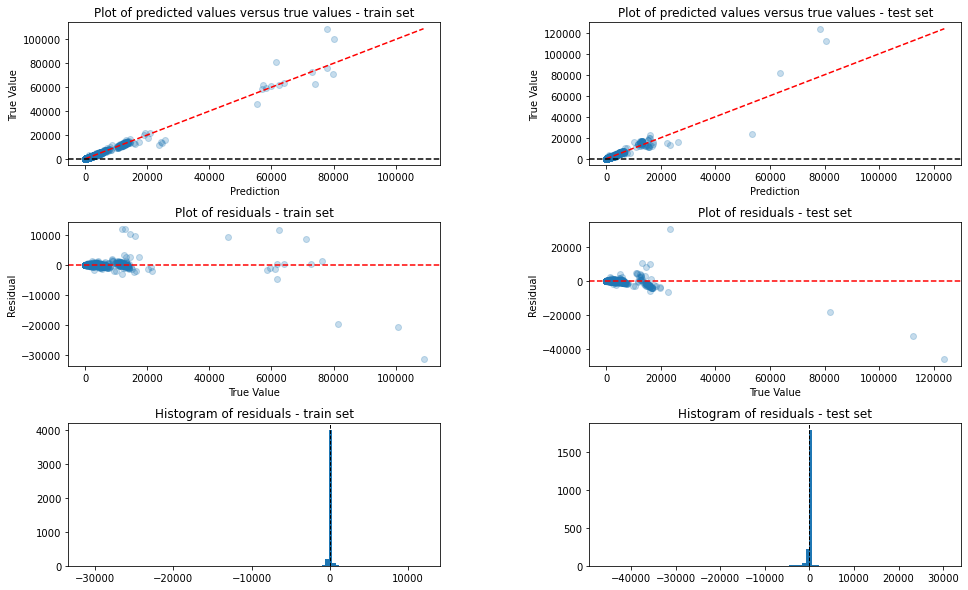

RMSE train: 794.0094029032367
DPA  train: 93.38945928671362
BIAS train: 0.3428396776838218

RMSE test:  1574.2517662562307
DPA  test: 84.5945147015936
BIAS test: -4.500807983640525


Finished iterating in: 18 seconds


|---------------------------	SellOut_2W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-2486041.4846345913

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 20, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


RMSE train: 773.2415320674233
DPA  train: 93.50699109091339
BIAS train: -0.18194320641416933

RMSE test:  1560.5138288374735
DPA  test: 84.47233916777678
BIAS test: -4.889502685751579


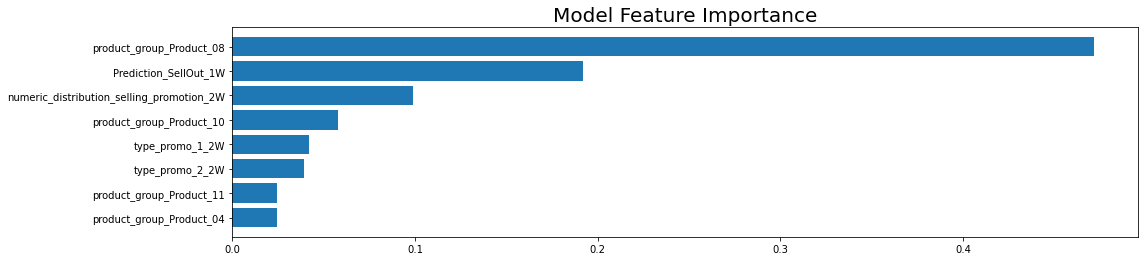

Finished iterating in: 16 seconds


|---------------------------	SellOut_3W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=15, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-2716683.152740596

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 15, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


RMSE train: 821.8221513576977
DPA  train: 93.23708320118642
BIAS train: 0.0984660356400769

RMSE test:  1697.9606015303207
DPA  test: 83.32276599107436
BIAS test: -3.144137479240598


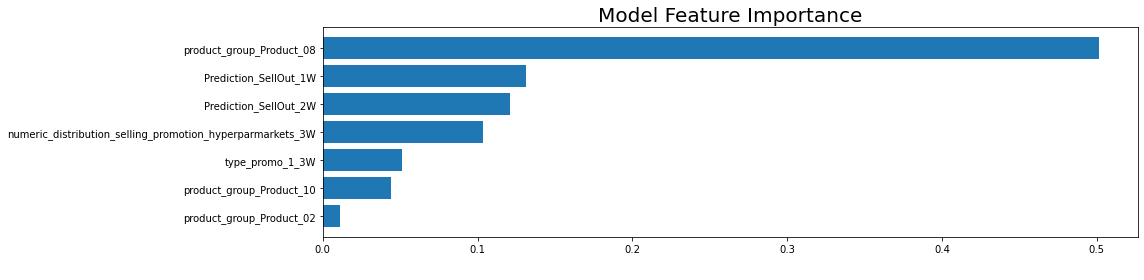

Finished iterating in: 18 seconds


|---------------------------	SellOut_4W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-2807960.7209932455

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 10, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


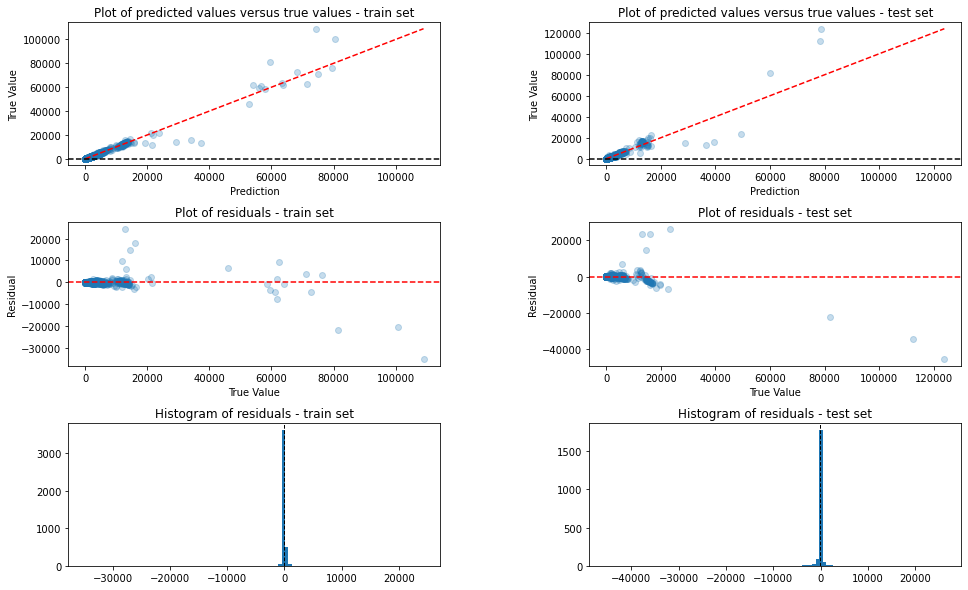

RMSE train: 945.4182875989317
DPA  train: 91.6132371973766
BIAS train: 0.3801068469414366

RMSE test:  1777.8310304500753
DPA  test: 82.68755821857326
BIAS test: -2.9480274097862624


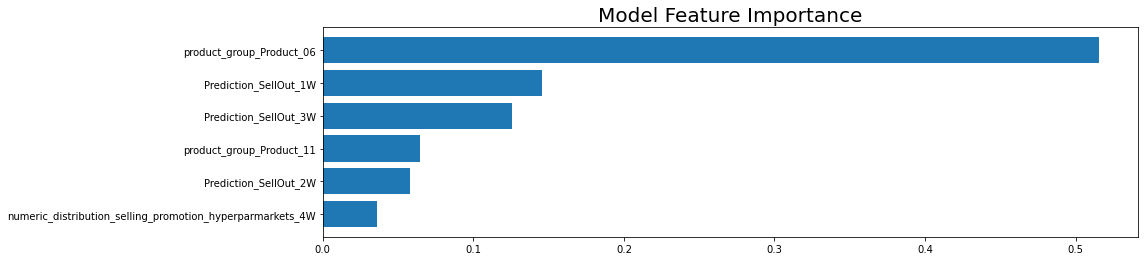

Finished iterating in: 18 seconds


|---------------------------	SellOut_5W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=15, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-4204093.589851969

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 15, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


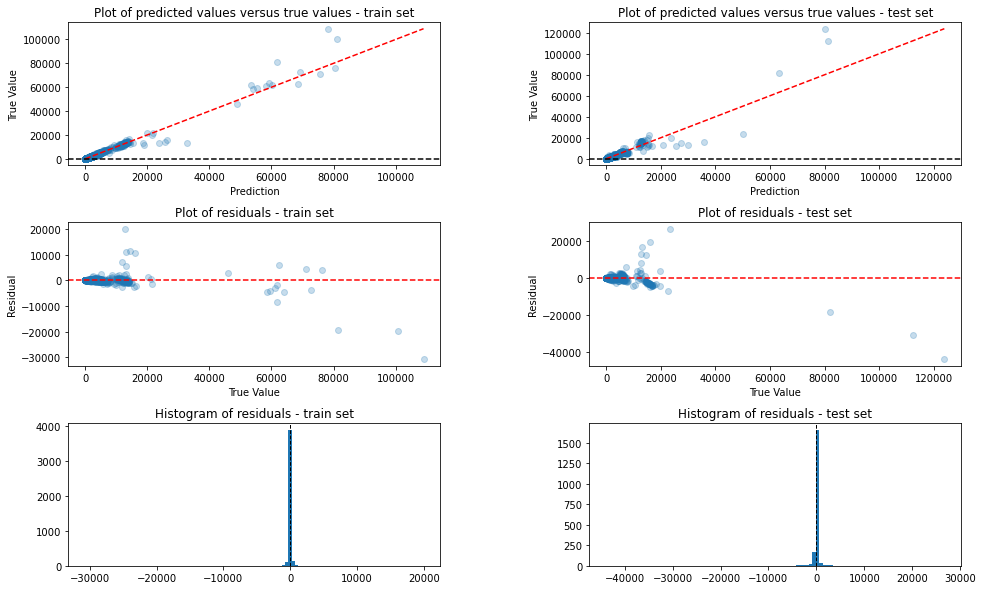

RMSE train: 832.2955196986891
DPA  train: 92.78197935106819
BIAS train: -0.11446827387648972

RMSE test:  1714.1127060042122
DPA  test: 81.08090136331693
BIAS test: -1.1760249138634338


Finished iterating in: 18 seconds


|---------------------------	SellOut_6W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=15, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-2638291.057945109

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 15, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


RMSE train: 872.2823885097656
DPA  train: 92.82443516563137
BIAS train: 0.12448430136135682

RMSE test:  1759.2481870030758
DPA  test: 81.80071446918569
BIAS test: -1.3491201145040486


Finished iterating in: 18 seconds


|---------------------------	SellOut_7W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=15, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-3742533.8579835766

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 15, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


RMSE train: 897.0198852788383
DPA  train: 92.62447177619956
BIAS train: 0.14872170467968426

RMSE test:  1614.1526881468715
DPA  test: 82.52107871882389
BIAS test: -2.3409847578631537


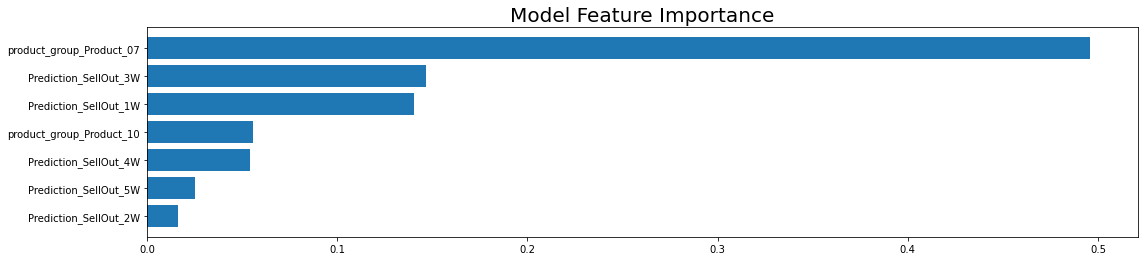

Finished iterating in: 19 seconds


|---------------------------	SellOut_8W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-2902953.5655572754

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 20, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


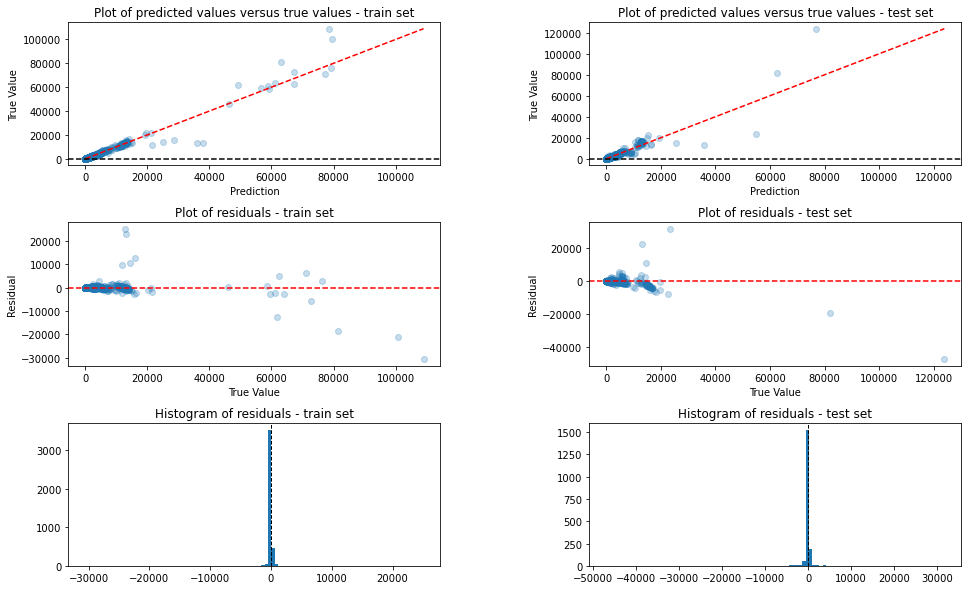

RMSE train: 943.3755627504579
DPA  train: 92.82880354323717
BIAS train: 0.24063831182746329

RMSE test:  1651.9376746572575
DPA  test: 81.67850003288888
BIAS test: -2.6897695719847117


Finished iterating in: 19 seconds


|---------------------------	SellOut_9W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-3686584.27856178

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 10, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


RMSE train: 826.6058371389204
DPA  train: 92.15483362227351
BIAS train: 0.0686008716830595

RMSE test:  1720.4192804064226
DPA  test: 81.93049895391108
BIAS test: -5.36067780371644


Finished iterating in: 19 seconds


|---------------------------	SellOut_10W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-3727501.6526187076

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 20, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


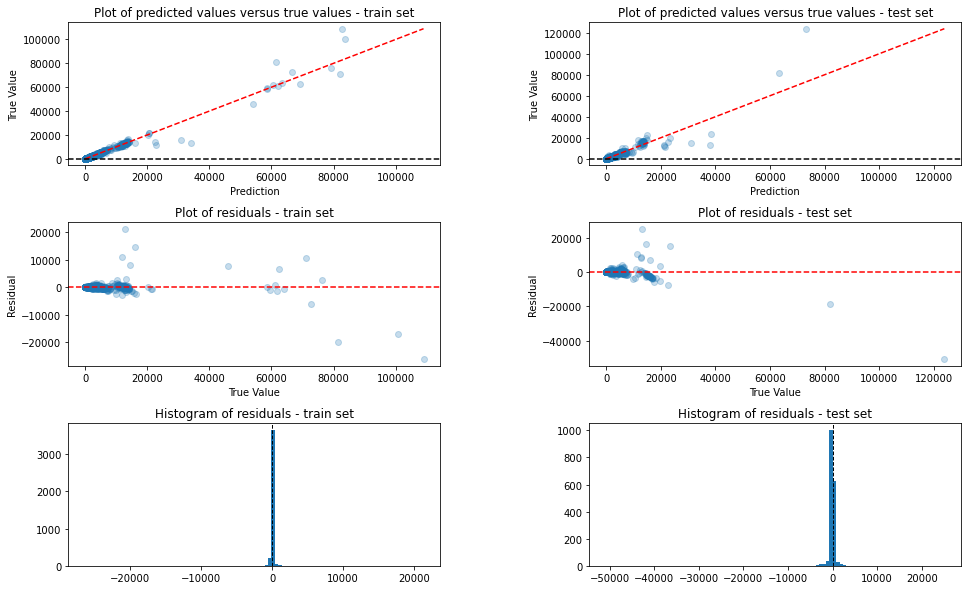

RMSE train: 810.6174039531799
DPA  train: 93.37987494359527
BIAS train: 0.45234154215838757

RMSE test:  1678.097044730726
DPA  test: 81.09749756023292
BIAS test: -0.6870875752183808


Finished iterating in: 20 seconds


|---------------------------	SellOut_11W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-3683225.9948143032

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 20, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


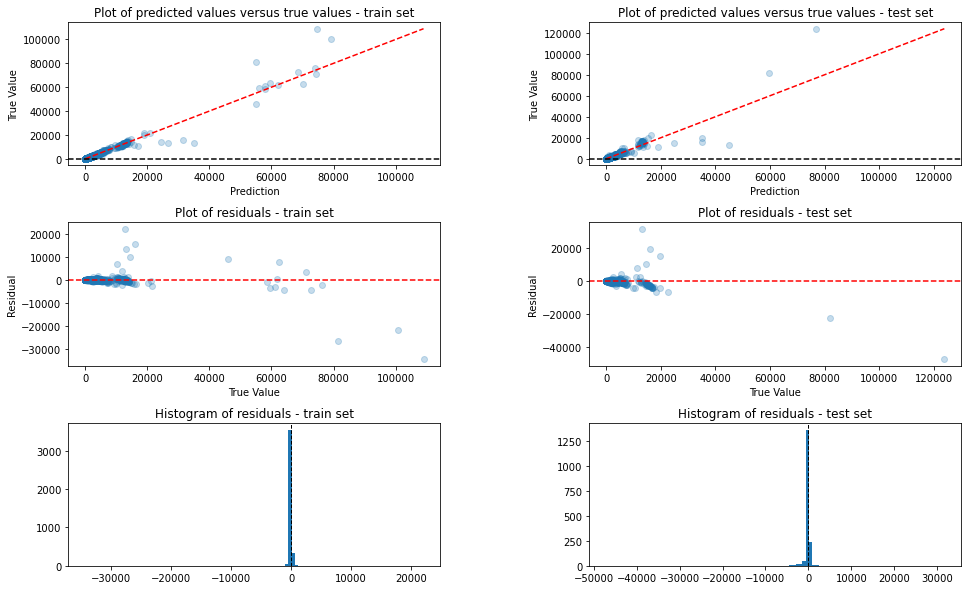

RMSE train: 969.0575604262193
DPA  train: 92.96229230821322
BIAS train: -0.04632014498198955

RMSE test:  1714.3235777232114
DPA  test: 81.45678436522596
BIAS test: -3.0124618146650546


Finished iterating in: 19 seconds


|---------------------------	SellOut_12W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-4932709.4784629205

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 20, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


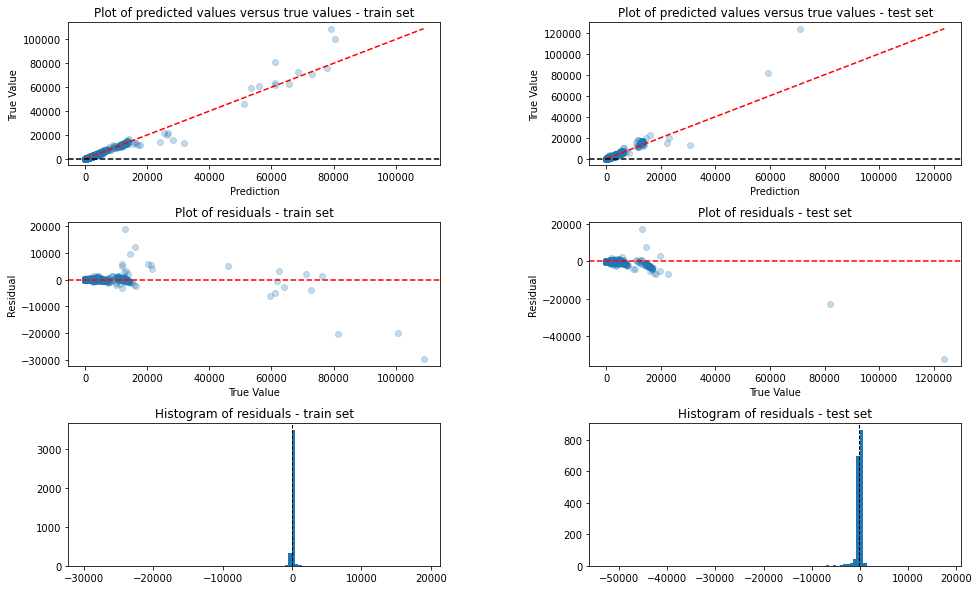

RMSE train: 829.349291857432
DPA  train: 93.24720882697306
BIAS train: 0.12184739852796642

RMSE test:  1596.1673291317386
DPA  test: 83.11145399041482
BIAS test: -6.338161988612727


Finished iterating in: 20 seconds


|---------------------------	SellOut_13W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=15, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-4411593.940368065

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 15, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


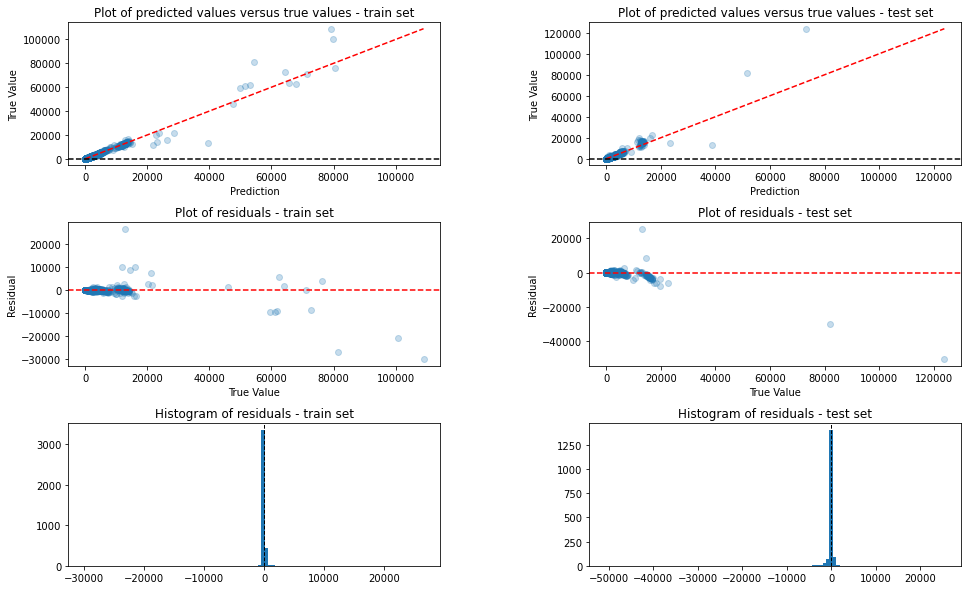

RMSE train: 963.9585003721946
DPA  train: 92.76173278978335
BIAS train: -0.3035641135769201

RMSE test:  1715.126286111809
DPA  test: 82.50698802732461
BIAS test: -6.2226690196749


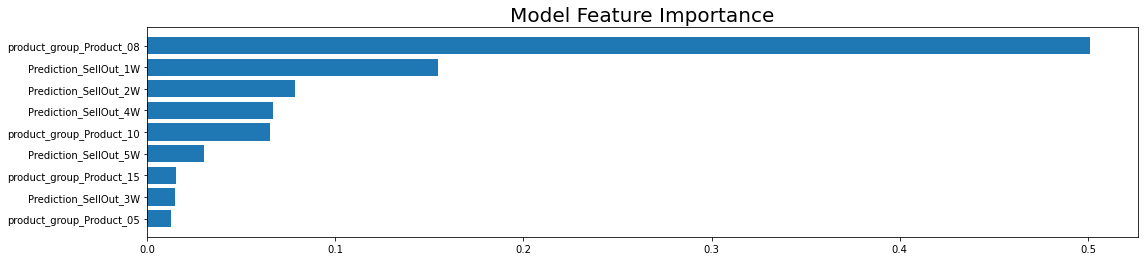

Finished iterating in: 22 seconds


|---------------------------	SellOut_14W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-4809572.471335763

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 10, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


RMSE train: 913.470368276576
DPA  train: 92.07893747060234
BIAS train: -0.4022740599127484

RMSE test:  1616.159160044525
DPA  test: 82.19407866238957
BIAS test: -7.018195352372497


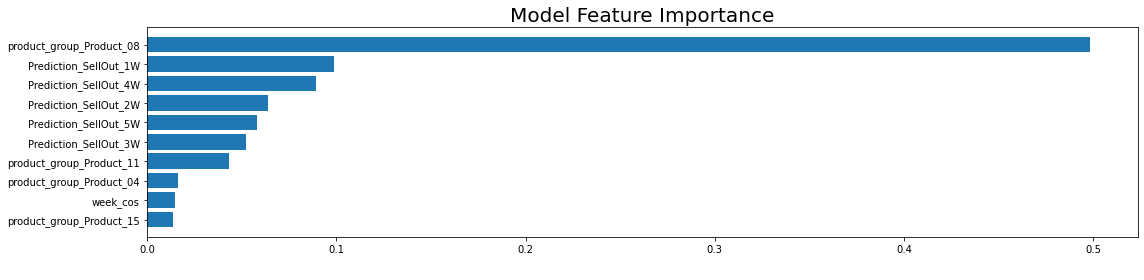

Finished iterating in: 21 seconds


|---------------------------	SellOut_15W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-4905962.828578775

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 20, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


RMSE train: 950.5562383162164
DPA  train: 92.88192446454106
BIAS train: 0.025465574676291392

RMSE test:  1592.3589024711266
DPA  test: 81.03365234727816
BIAS test: -3.0864339288801577


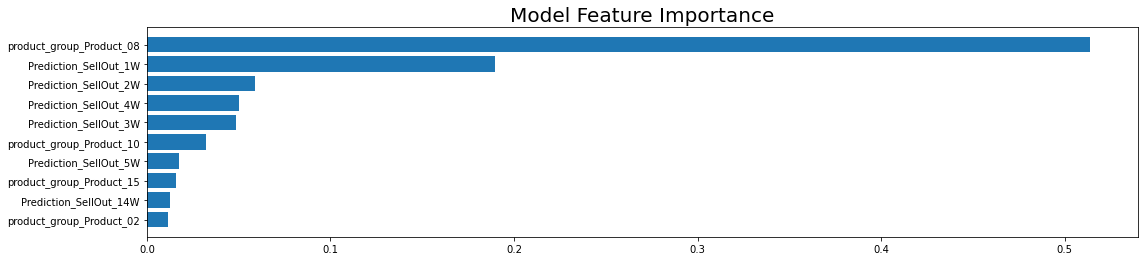

Finished iterating in: 22 seconds


|---------------------------	SellOut_16W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-4804186.015233727

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 20, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


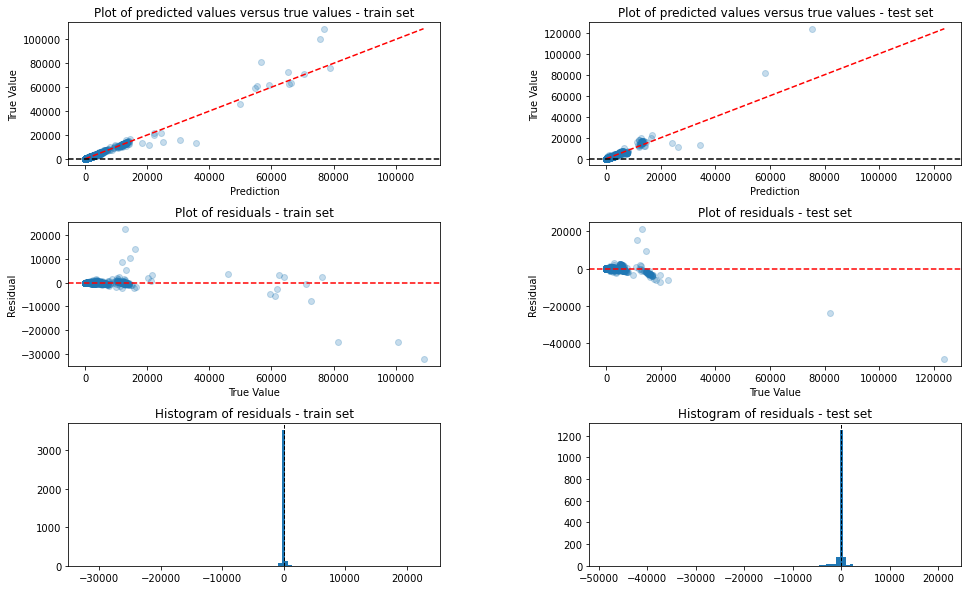

RMSE train: 962.6876455081448
DPA  train: 93.01378187175334
BIAS train: -0.11014916116318839

RMSE test:  1695.4509749171434
DPA  test: 80.25760083913393
BIAS test: -3.761175611166751


Finished iterating in: 22 seconds


|---------------------------	SellOut_17W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-5669752.750625871

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 20, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


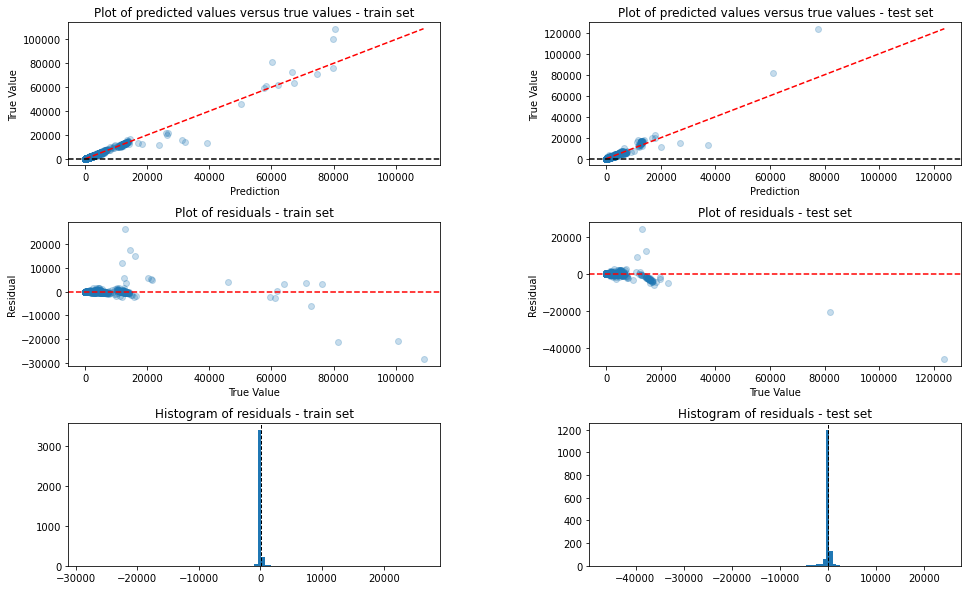

RMSE train: 956.8131516874441
DPA  train: 92.7986957674462
BIAS train: 0.7607435345364064

RMSE test:  1640.173877626057
DPA  test: 80.76525760871255
BIAS test: -3.365301431157789


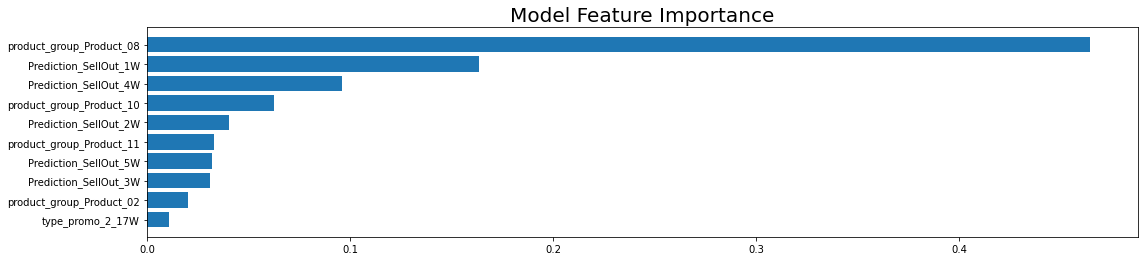

Finished iterating in: 21 seconds


|---------------------------	SellOut_18W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=15, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-5410022.029954078

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 15, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


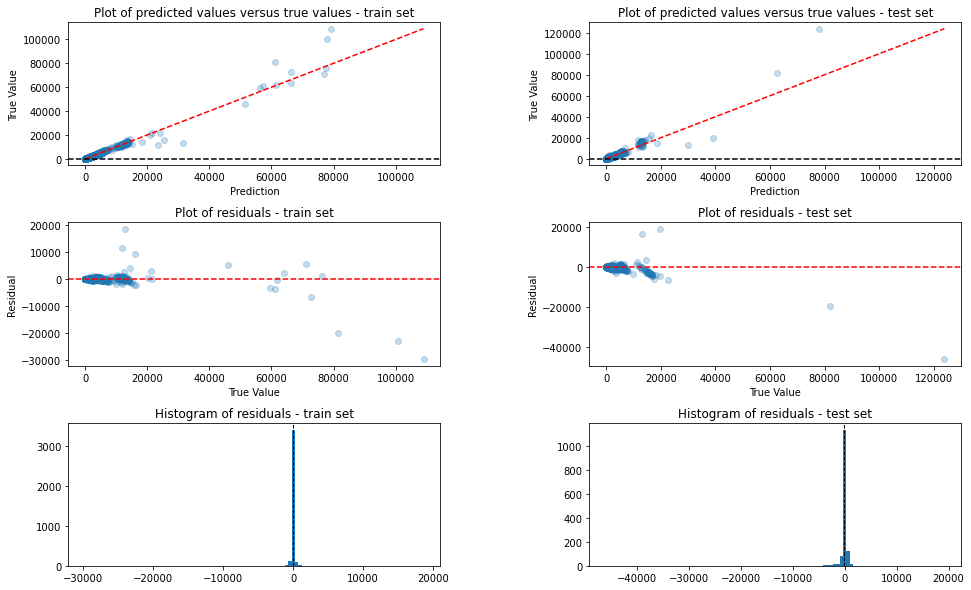

RMSE train: 847.7209413111349
DPA  train: 93.33364147981047
BIAS train: -0.08861107603864676

RMSE test:  1607.6304013605125
DPA  test: 80.95559941257142
BIAS test: -4.359810227452778


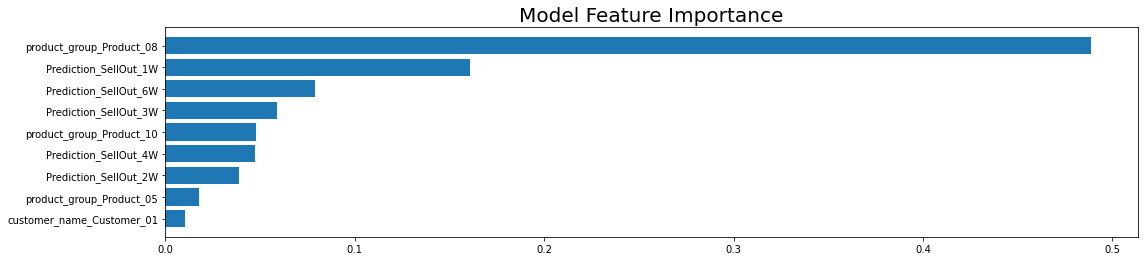

Finished iterating in: 22 seconds


|---------------------------	SellOut_19W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-4719203.379629119

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 20, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


RMSE train: 869.9212623874502
DPA  train: 93.38607739676506
BIAS train: 0.6986116496561555

RMSE test:  1457.914039553429
DPA  test: 81.52613177759237
BIAS test: -5.52296106634103


Finished iterating in: 22 seconds


|---------------------------	SellOut_20W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-4741384.538755054

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 20, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


RMSE train: 988.3990595835031
DPA  train: 92.75884904949545
BIAS train: 0.45818799891772577

RMSE test:  1569.5198972424598
DPA  test: 81.10509452958014
BIAS test: -3.9462306949842083


Finished iterating in: 23 seconds


|---------------------------	orders_SellIn_1W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-5056520.962260431

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 20, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


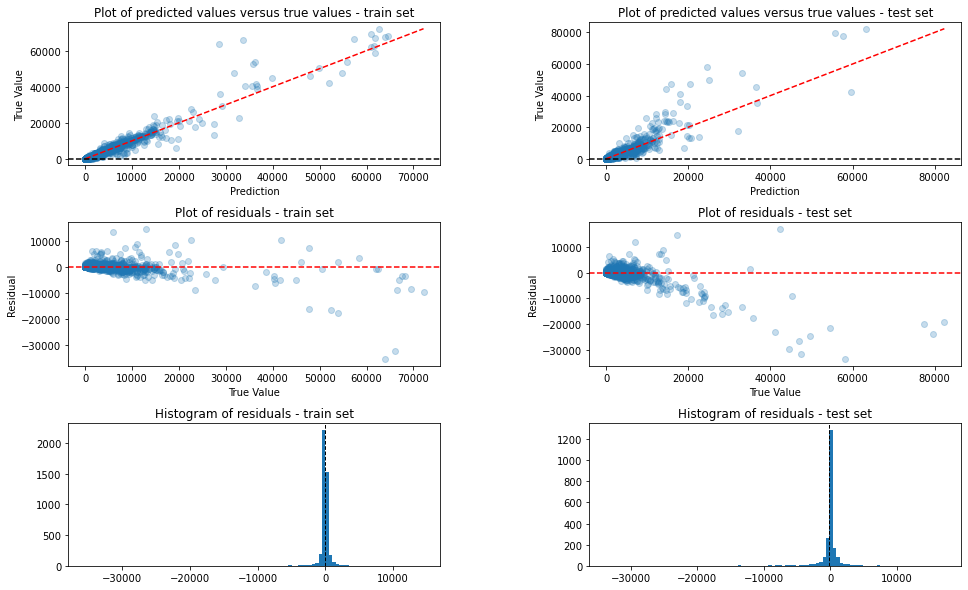

RMSE train: 1199.6692568395672
DPA  train: 81.8414876819964
BIAS train: -0.2552327802281613

RMSE test:  2443.5535283885324
DPA  test: 63.63026716777319
BIAS test: -8.85242343624835


Finished iterating in: 14 seconds


|---------------------------	orders_SellIn_2W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-5115711.6645965995

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 10, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


RMSE train: 1259.8534782619174
DPA  train: 76.7864323117514
BIAS train: 0.27290148570265693

RMSE test:  2557.922150833648
DPA  test: 63.769248422428916
BIAS test: -10.61329710901216


Finished iterating in: 13 seconds


|---------------------------	orders_SellIn_3W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=15, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-5821231.513344441

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 15, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


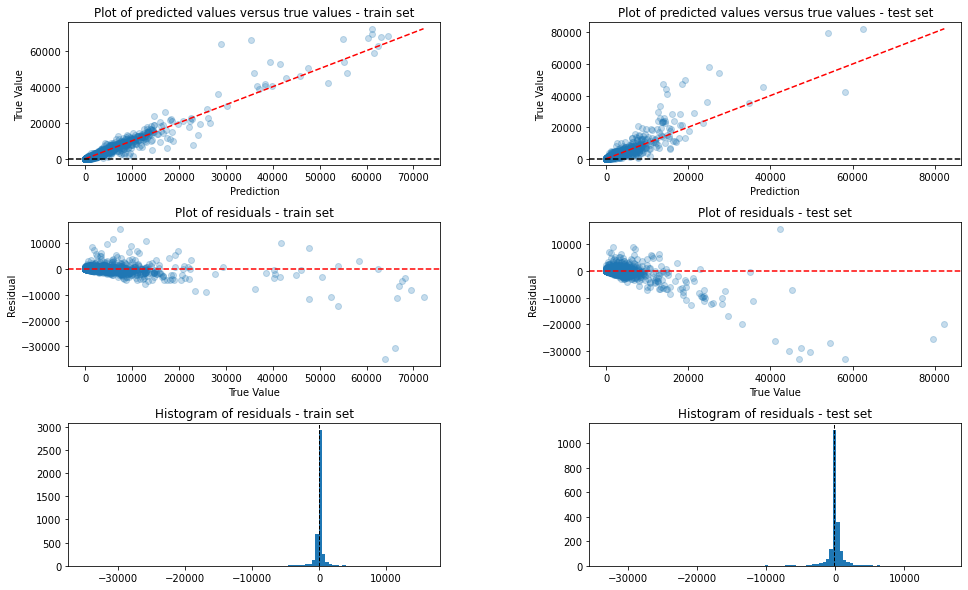

RMSE train: 1193.7983675244013
DPA  train: 80.56776552331581
BIAS train: 0.44710580362135727

RMSE test:  2516.6517186625892
DPA  test: 62.20622758446774
BIAS test: -8.960511968644568


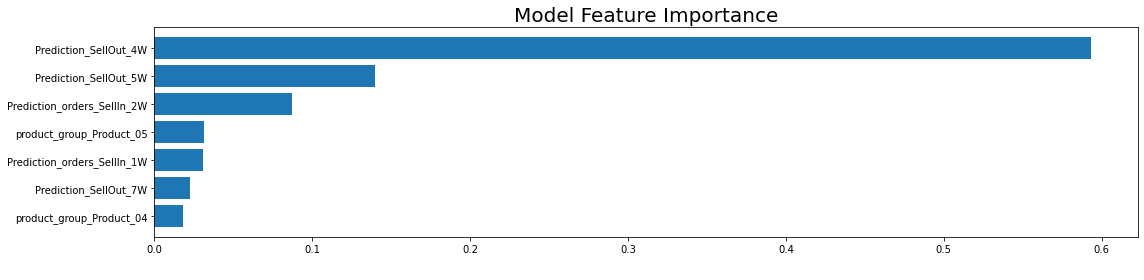

Finished iterating in: 14 seconds


|---------------------------	orders_SellIn_4W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=15, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-5876411.508840005

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 15, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


RMSE train: 1222.8141236749175
DPA  train: 80.5447616017318
BIAS train: 0.29692590729085466

RMSE test:  2629.654604502503
DPA  test: 59.84102502090208
BIAS test: -8.606670893181462


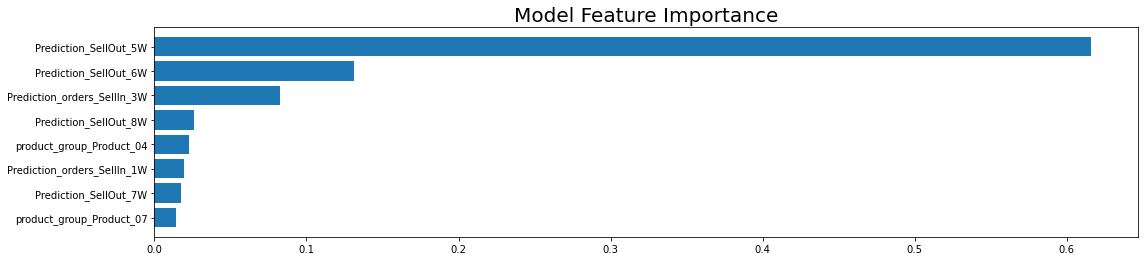

Finished iterating in: 16 seconds


|---------------------------	orders_SellIn_5W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-6030262.420733484

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 20, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


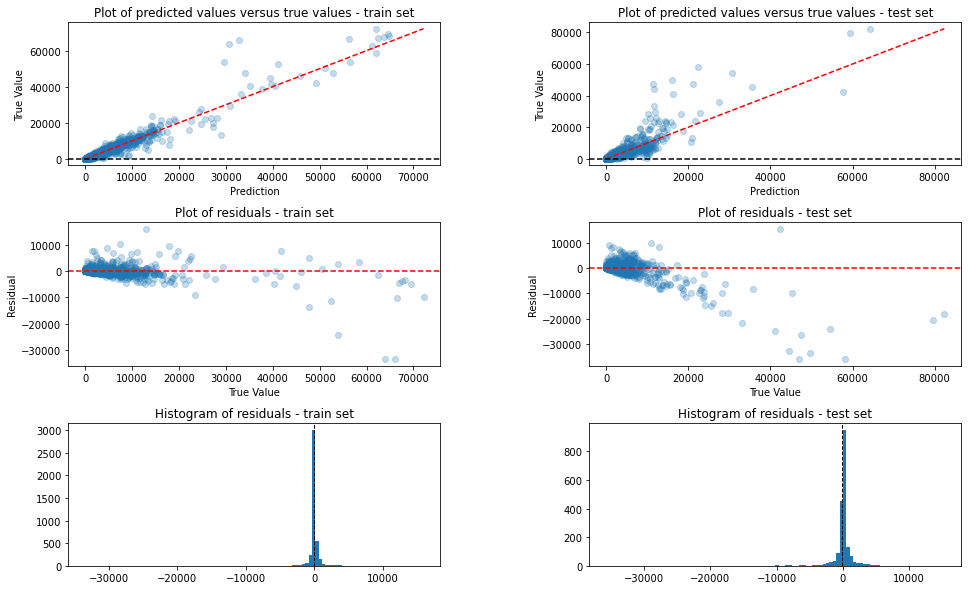

RMSE train: 1206.633986412698
DPA  train: 81.46606398661582
BIAS train: 0.49638612412340616

RMSE test:  2658.56640880357
DPA  test: 58.854317739503834
BIAS test: -7.9953345956059945


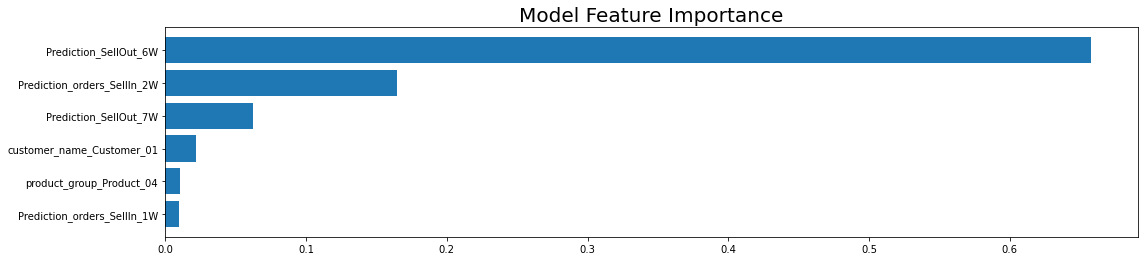

Finished iterating in: 18 seconds


|---------------------------	orders_SellIn_6W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-5987913.520720106

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 20, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


RMSE train: 1213.253110218307
DPA  train: 81.42360588994534
BIAS train: 0.4277448666646274

RMSE test:  2610.0701656185656
DPA  test: 59.66557782788446
BIAS test: -8.901191859195793


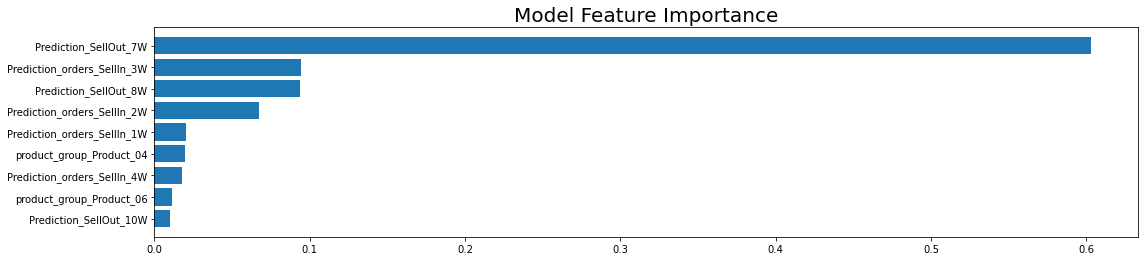

Finished iterating in: 17 seconds


|---------------------------	orders_SellIn_7W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-6397222.897484608

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 10, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


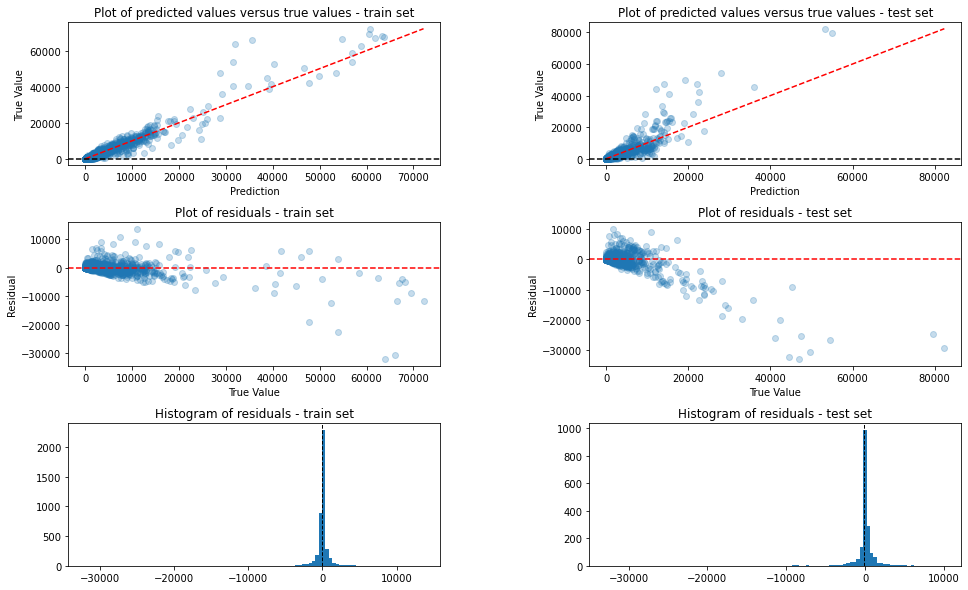

RMSE train: 1283.6121793004347
DPA  train: 76.15508109854713
BIAS train: -0.06150348668564641

RMSE test:  2641.6184174630316
DPA  test: 58.198051271561894
BIAS test: -8.517820383097684


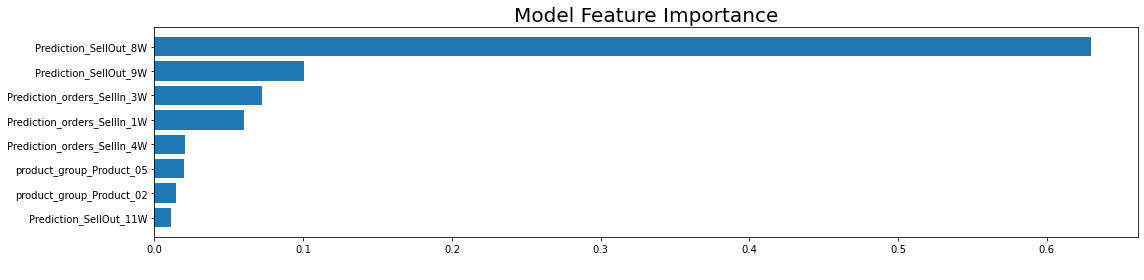

Finished iterating in: 17 seconds


|---------------------------	orders_SellIn_8W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=15, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-6207974.5330369575

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 15, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


RMSE train: 1129.1034848900786
DPA  train: 81.12935417561175
BIAS train: 0.15446893063626022

RMSE test:  2634.318132659915
DPA  test: 57.73695276673935
BIAS test: -7.906061350432332


Finished iterating in: 17 seconds


|---------------------------	orders_SellIn_9W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=15, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-5874117.001503599

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 15, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


RMSE train: 1179.978146344667
DPA  train: 80.99987061315689
BIAS train: -0.10094833762308567

RMSE test:  2526.916669030638
DPA  test: 58.752135848129264
BIAS test: -9.876361726611787


Finished iterating in: 19 seconds


|---------------------------	orders_SellIn_10W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=15, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-6578500.1219452

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 15, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


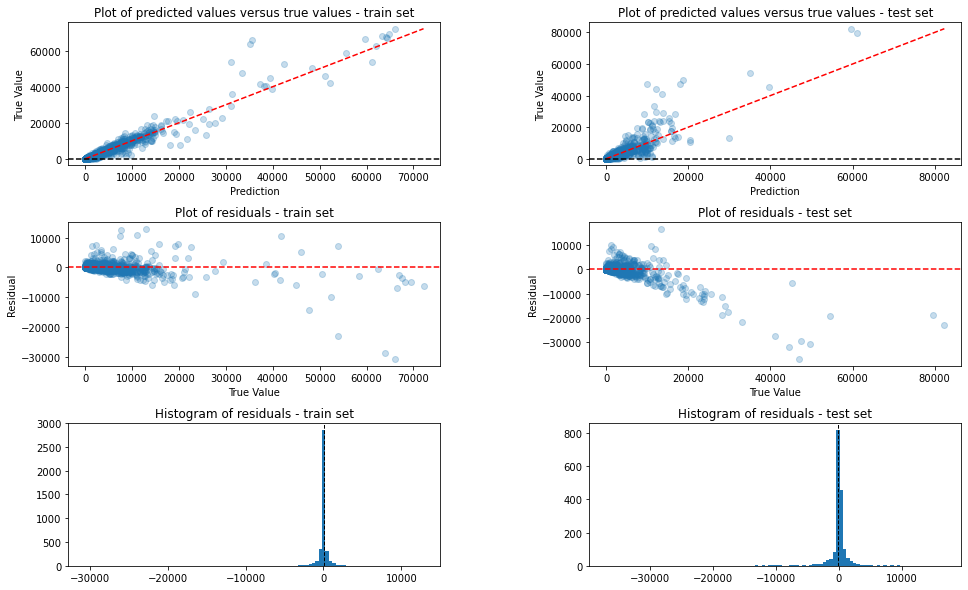

RMSE train: 1179.5461279438196
DPA  train: 80.90436964161242
BIAS train: 0.6765241781957447

RMSE test:  2722.075690484838
DPA  test: 56.87744795186009
BIAS test: -10.025521980232378


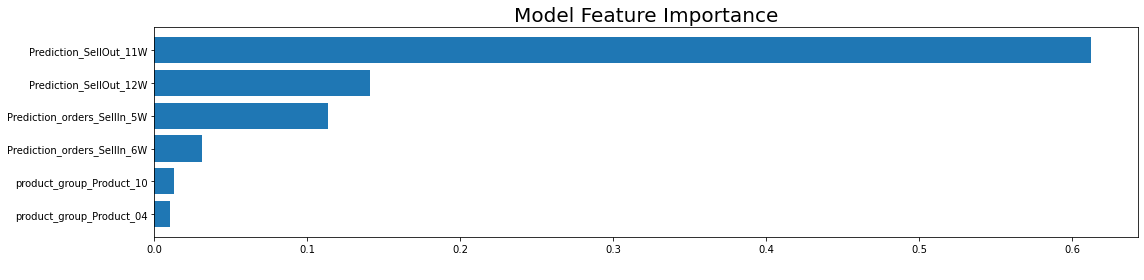

Finished iterating in: 18 seconds


|---------------------------	orders_SellIn_11W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-6404876.85937835

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 10, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


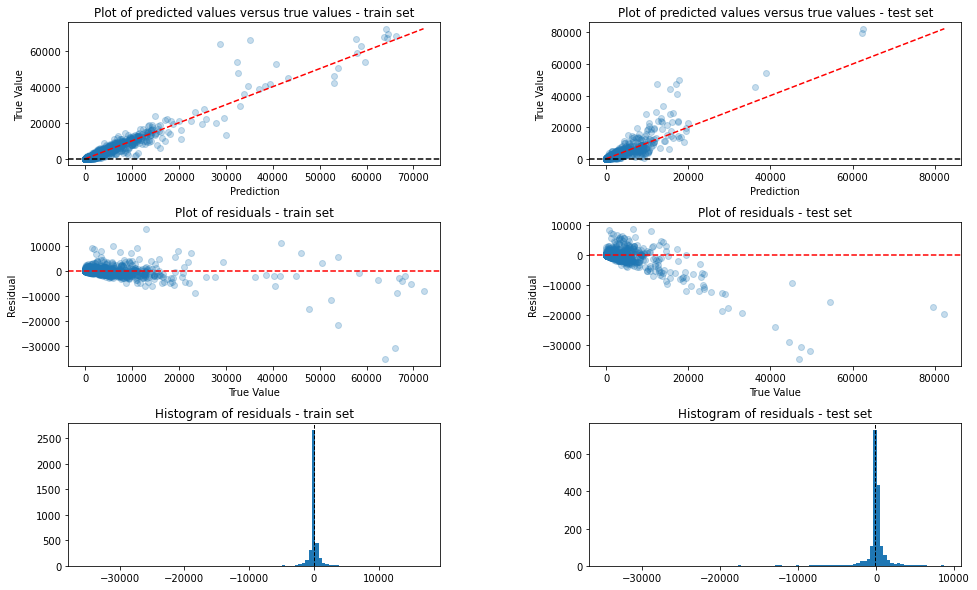

RMSE train: 1296.615245788971
DPA  train: 76.49319793883463
BIAS train: 0.677369536479677

RMSE test:  2535.4929628044097
DPA  test: 59.053227279913514
BIAS test: -8.643114132233075


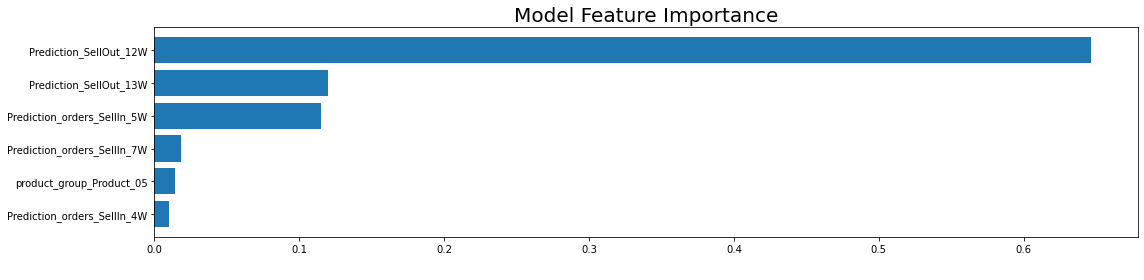

Finished iterating in: 19 seconds


|---------------------------	orders_SellIn_12W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-6304208.067790023

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 20, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


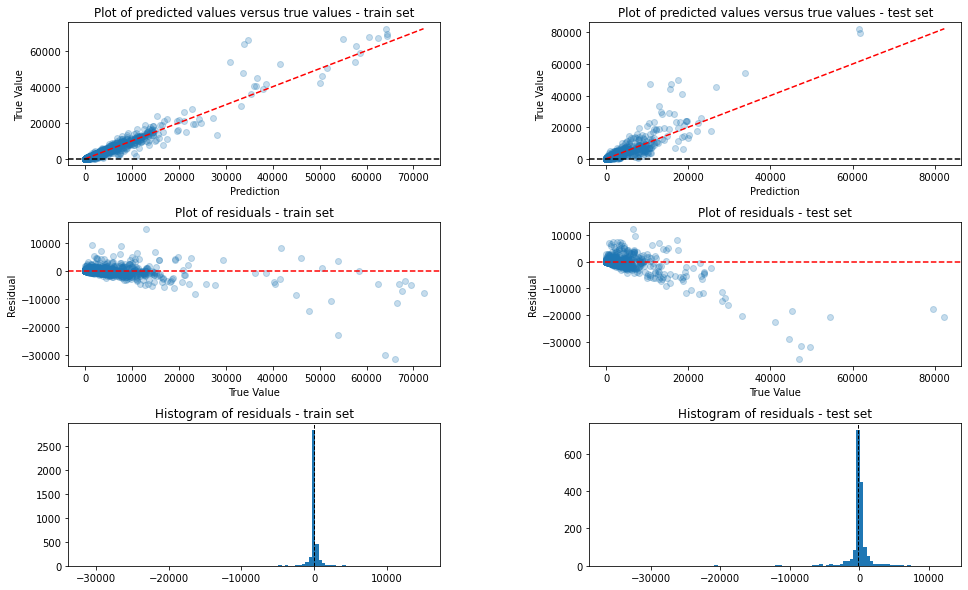

RMSE train: 1188.6454112648807
DPA  train: 81.81962665136476
BIAS train: 0.12782713734594678

RMSE test:  2603.4723996029365
DPA  test: 58.538468095427966
BIAS test: -6.758643503962201


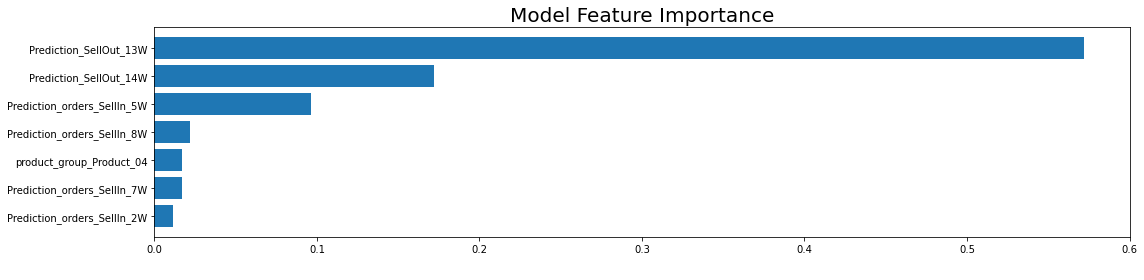

Finished iterating in: 21 seconds


|---------------------------	orders_SellIn_13W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=15, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-6751156.543203135

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 15, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


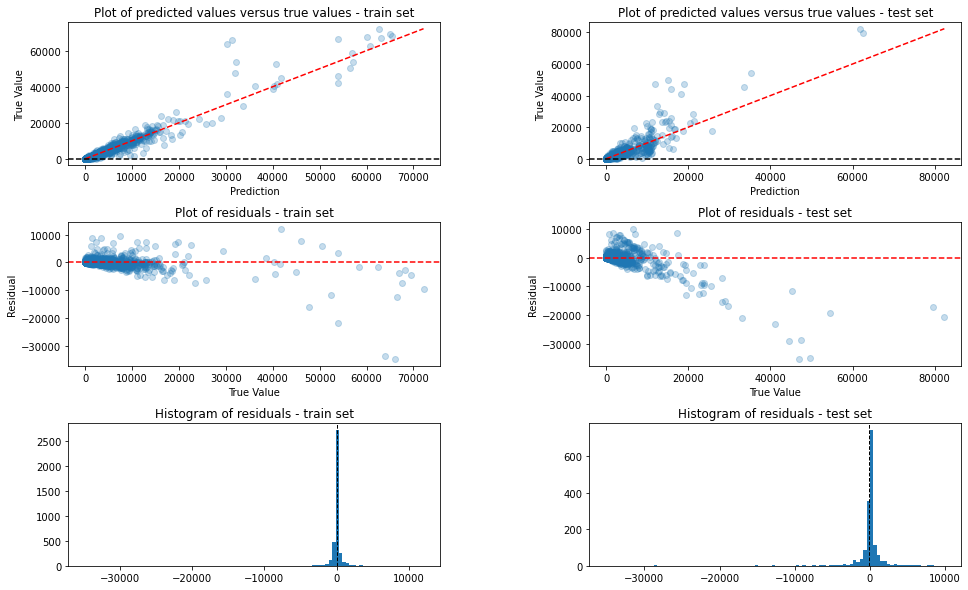

RMSE train: 1252.067571053442
DPA  train: 80.98149844593138
BIAS train: 0.3107942173281595

RMSE test:  2623.0498013151646
DPA  test: 57.83549781943672
BIAS test: -7.051092825557187


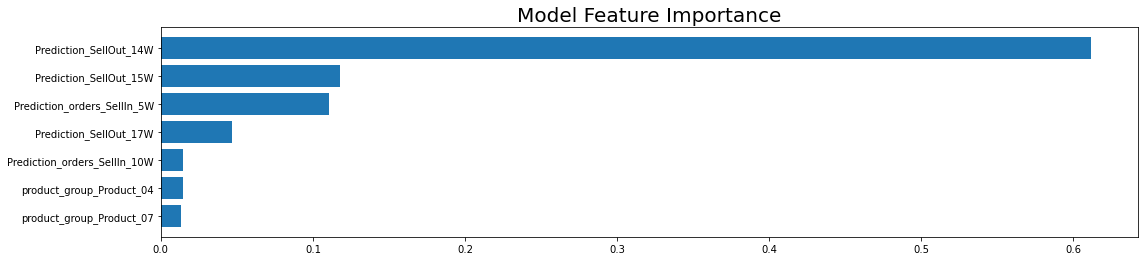

Finished iterating in: 21 seconds


|---------------------------	orders_SellIn_14W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=15, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-6514562.306829982

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 15, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


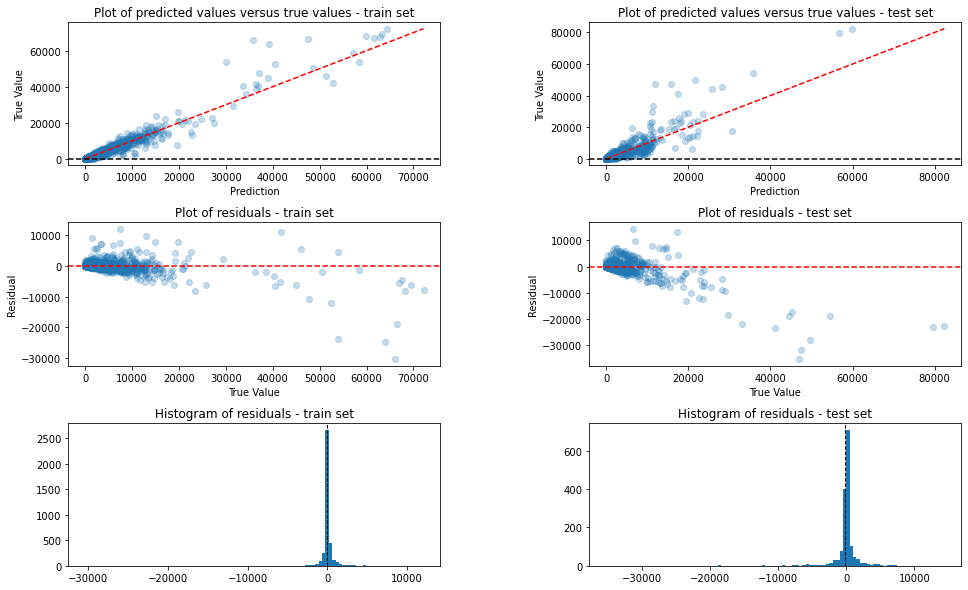

RMSE train: 1204.8919730375007
DPA  train: 80.4718738670836
BIAS train: 0.6657988030755614

RMSE test:  2582.891744498051
DPA  test: 58.73080292634317
BIAS test: -5.373978998347497


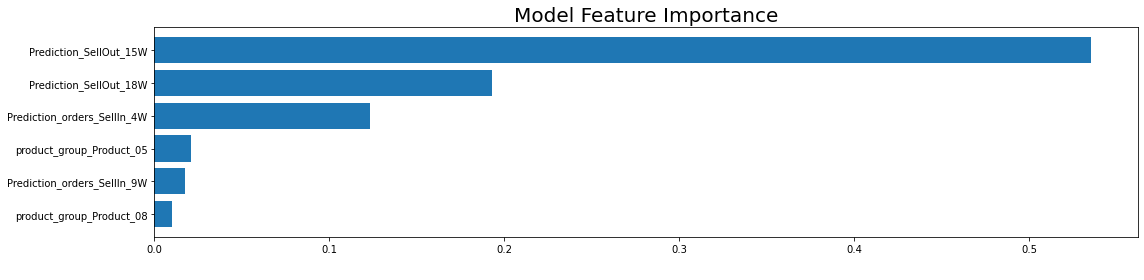

Finished iterating in: 21 seconds


|---------------------------	orders_SellIn_15W	---------------------------|
Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best estimator: 
Pipeline(steps=[('feature_selection', FeatureSelection()),
                ('regressor',
                 RandomForestRegressor(max_depth=15, min_samples_leaf=3,
                                       n_estimators=50, random_state=123))])

The best score: 
-6529763.230289247

The best parameters: 
{'regressor__criterion': 'mse', 'regressor__max_depth': 15, 'regressor__min_samples_leaf': 3, 'regressor__n_estimators': 50}

Evaluation charts


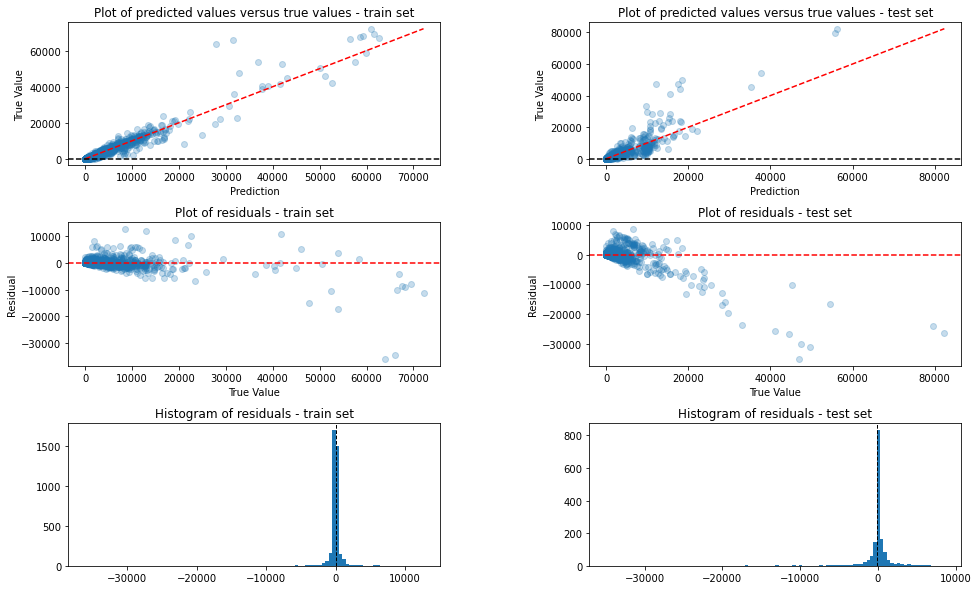

RMSE train: 1268.407450464927
DPA  train: 80.77310191330332
BIAS train: 0.5525850769623559

RMSE test:  2726.797628525093
DPA  test: 57.0986425854706
BIAS test: -7.833709591844379


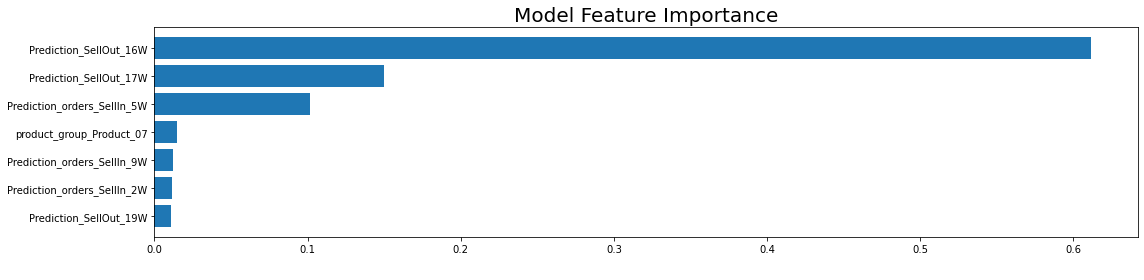

Finished iterating in: 20 seconds




In [17]:
for horizon_prediction in target_columns:
    start_time = time.time()
    print(f'|---------------------------\t{horizon_prediction}\t---------------------------|')
    ###################### Prepare Train Test Sets ######################
    # Train
    y_train_single_horizon = y_train[horizon_prediction].copy()
    X_train_single_horizon = X_train.loc[~y_train_single_horizon.isnull(),
                                         Initial_Feature_Selection(horizon_prediction, dataset)].copy()
    y_train_single_horizon.dropna(inplace=True)
    # Test
    y_test_single_horizon = y_test[horizon_prediction].copy()
    X_test_single_horizon = X_test.loc[~y_test_single_horizon.isnull(), 
                                       Initial_Feature_Selection(horizon_prediction, dataset)].copy()
    y_test_single_horizon.dropna(inplace=True)
    
    
    ###################### Hyperparameter Optimization ######################
    random_forest_pipeline = Pipeline(steps=[('feature_selection', FeatureSelection()),
                                             ('regressor', RandomForestRegressor(random_state=123))])
    
    param_random_forest = {
        'regressor__max_depth': [10, 15, 20],
        'regressor__min_samples_leaf': [3, 5, 10],
        'regressor__n_estimators': [50],
        'regressor__criterion': ['mse'],
    }
    
    random_forest = GridSearchCV(random_forest_pipeline, param_random_forest, 
                                 cv=TimeSeriesSplit(n_splits=3).split(X_train_single_horizon), n_jobs=3, 
                                 scoring = 'neg_mean_squared_error', verbose=10)
    random_forest.fit(X_train_single_horizon, y_train_single_horizon)
    print("The best estimator: ", random_forest.best_estimator_,
          "\nThe best score: ", random_forest.best_score_,
          "\nThe best parameters: ", random_forest.best_params_, sep="\n")
    
    random_forest_model = random_forest.best_estimator_
    
    print('\nEvaluation charts')
    model_evaluation(model = random_forest_model,
                     Xtrain = X_train_single_horizon, ytrain = y_train_single_horizon,
                     Xtest  = X_test_single_horizon,  ytest  = y_test_single_horizon)
    
    
    X_train[f'Prediction_{horizon_prediction}'] = random_forest_model.predict(X_train.fillna(0))
    X_test[f'Prediction_{horizon_prediction}'] = random_forest_model.predict(X_test.fillna(0))
    
    
    ###################### Save model and hyperparameters ###################### 
    dump(random_forest_model, f'models/model_horizon_{horizon_prediction}.pkl', compress=True)
    dump(random_forest_model.get_params(), f'models/hyperparameters_horizon_{horizon_prediction}.pkl', compress=True)
    
    elapsed_time = time.time() - start_time
    print("Finished iterating in: " + str(int(elapsed_time))  + " seconds")
    print('\n')

# 6. Make the Forecast

Customer_01


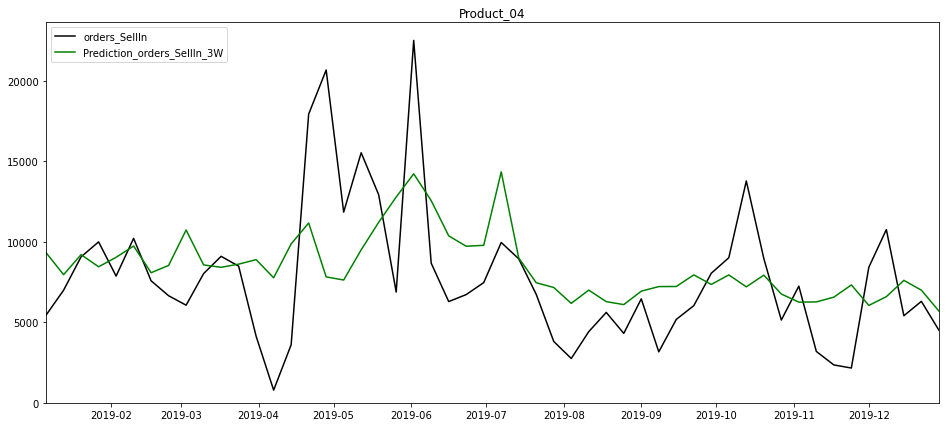

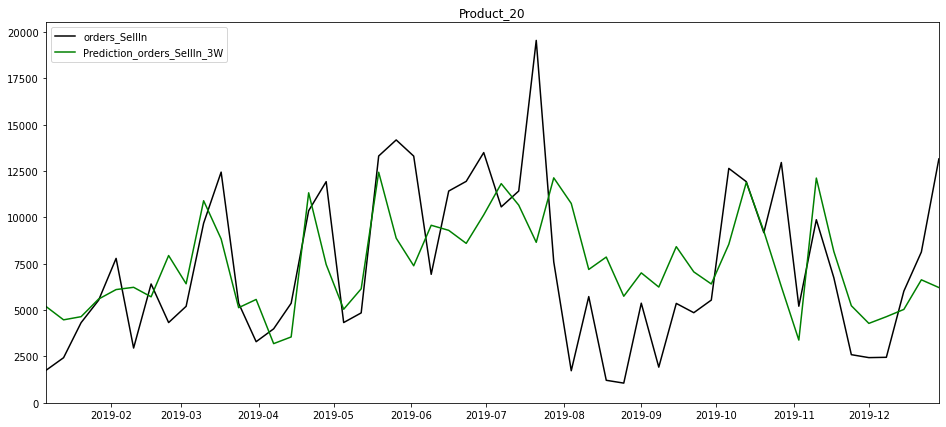

In [20]:
make_forecast(selected_Forecast = 'orders_SellIn', horizon_Forecast = 3, start = '2019-01-06', end = '2019-12-29',
              num=7, df = dataset, pipep_prep = pipeline_preprocessing, target_columns = target_columns)